In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(f'Overall of samples is {y.shape[0]}')
print(f'Size of the features is {X.shape}')

Overall of samples is 70000
Size of the features is (70000, 784)


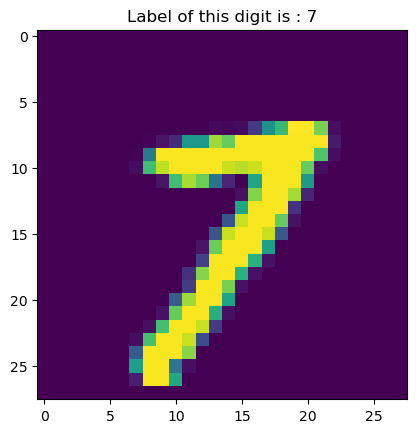

In [3]:
def show_sample(index):
    sample = X.iloc[index, :].values
    label = y[index]
    X_mat = sample.reshape(28, 28)
    plt.imshow(X_mat)
    plt.title(f'Label of this digit is : {label}')
    plt.show()

show_sample(40000)

In [4]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test.iloc[i, :].values.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()



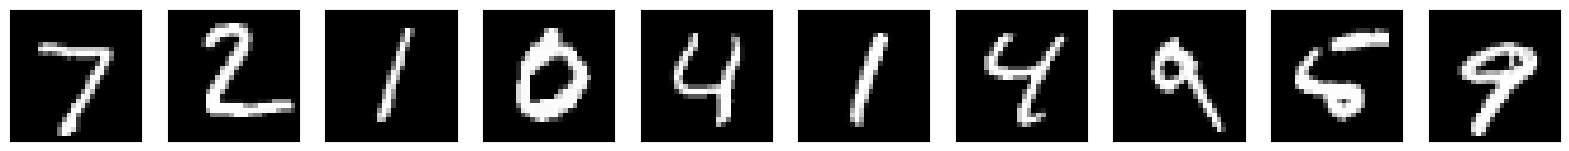

In [6]:
show_imgs(X_test)

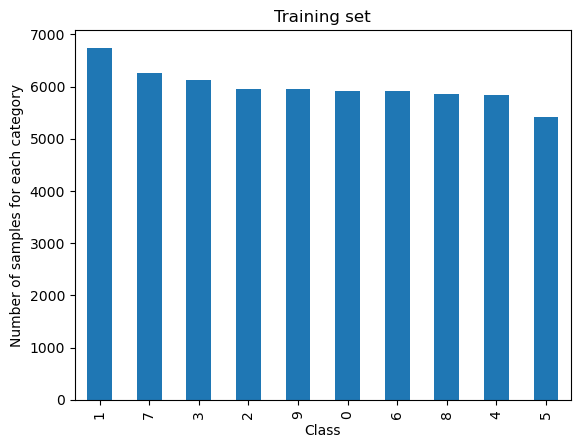

In [7]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

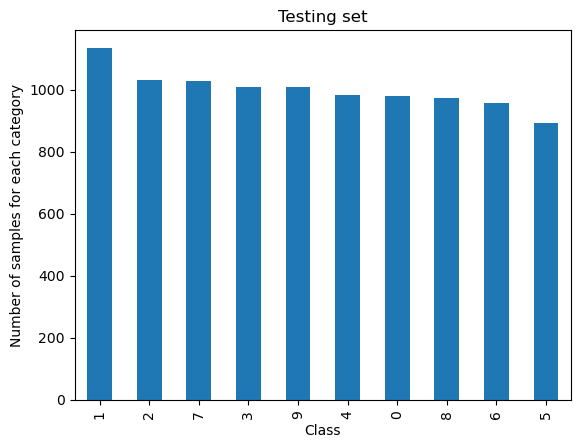

In [8]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

In [9]:
accuracies = []
kVals = range(1, 30, 2)

for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score*100))
    accuracies.append(score)

#find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=96.91%
k=3, accuracy=97.05%
k=5, accuracy=96.88%
k=7, accuracy=96.94%
k=9, accuracy=96.59%
k=11, accuracy=96.68%
k=13, accuracy=96.53%
k=15, accuracy=96.33%
k=17, accuracy=96.30%
k=19, accuracy=96.32%
k=21, accuracy=96.30%
k=23, accuracy=96.19%
k=25, accuracy=96.09%
k=27, accuracy=96.04%
k=29, accuracy=95.93%
k=3 achieved highest accuracy of 97.05% on validation data


In [10]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9705